<a href="https://colab.research.google.com/github/baharjr/baharjr/blob/main/mixed%20dentition%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content.drive')


Mounted at /content.drive


In [2]:
from tensorflow.keras.utils import image_dataset_from_directory
import pathlib, os

In [3]:
base_dir= pathlib.Path('/content.drive/MyDrive/mixed_data')

In [4]:
import cv2
from skimage.util import random_noise
from keras.models import load_model
from keras.preprocessing import image as pile
import PIL

import libraries

In [5]:
from keras import backend as K
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
import warnings
warnings.filterwarnings('ignore')
#importing tensorflow
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten,BatchNormalization
from tensorflow.keras.models import Model
import random as rn
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from tensorflow.keras.models import Model, Sequential

Height and widths of the dataset

In [6]:
list_of_heights = []
list_of_widths = []
dir_path = "/content.drive/MyDrive/mixed_data/train"
for i in os.listdir(dir_path):
    for image in os.listdir(os.path.join(dir_path,i)):
        img = cv2.imread(os.path.join(os.path.join(dir_path,i),image), cv2.IMREAD_UNCHANGED)
        # Dimensions of image
        shape = img.shape
        list_of_heights.append(shape[0])
        list_of_widths.append(shape[1])

In [7]:
for i in os.listdir(dir_path):
    print("No of Images in ",i," category is ",len(os.listdir(os.path.join(dir_path,i))))

No of Images in  mixed  category is  106
No of Images in  adult  category is  205


Text(0.5, 1.0, 'heights')

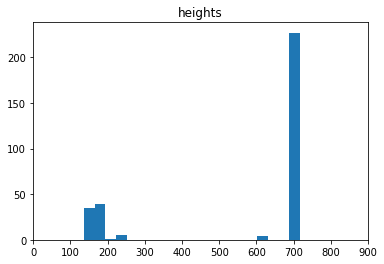

In [8]:
plt.hist(list_of_heights,bins=20)
plt.xlim(0,900)
plt.title('heights')

(0.0, 900.0)

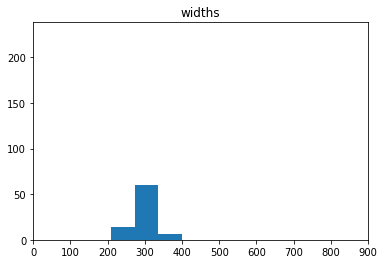

In [9]:
plt.hist(list_of_widths,bins=20)
plt.title('widths')
plt.xlim(0,900)

In [10]:
from tensorflow import keras
from keras import layers
cnn_base=keras.applications.vgg16.VGG16(
    weights= 'imagenet',
    include_top= False,
    input_shape= (180,180,3))
cnn_base.trainable= False
cnn_base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

In [11]:
data_augmentation= keras.Sequential(
    [layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.3)])

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
  
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])

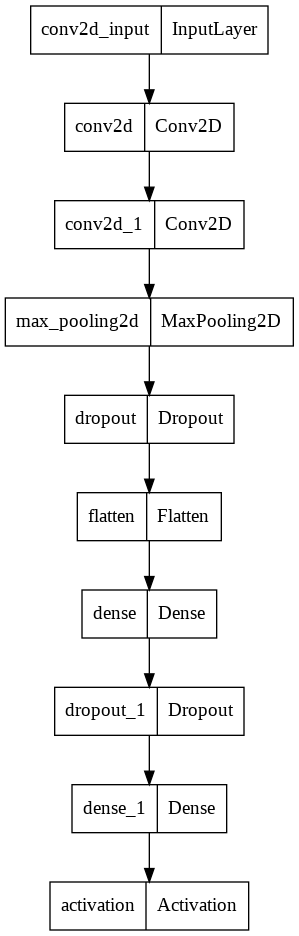

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [14]:
image_shape=(150, 150, 3)
image_gen = ImageDataGenerator(rescale=1/255)
train_image_gen=image_gen.flow_from_directory('/content.drive/MyDrive/mixed_data/train',
                                             target_size=image_shape[:2],
                                             batch_size=1,
                                             class_mode='binary')


test_image_gen=image_gen.flow_from_directory('/content.drive/MyDrive/mixed_data/test',
                                             target_size=image_shape[:2],
                                             batch_size=1,
                                             class_mode='binary',
                                             seed=123#To help Visualize the results
                                             )

Found 311 images belonging to 2 classes.
Found 223 images belonging to 2 classes.


In [16]:
callbacks= [
    keras.callbacks.ModelCheckpoint(
        filepath= 'feature_extraction_with_data_augmentation.keras',
        save_best_only= True,
        monitor='val_loss'
    )]

In [17]:
history =model.fit(train_image_gen,
                   epochs=20,)

Epoch 1/20
311/311 [==============================] - 96s 308ms/step - loss: 0.6901 - accuracy: 0.6270
Epoch 2/20
311/311 [==============================] - 97s 312ms/step - loss: 0.6561 - accuracy: 0.6592
Epoch 3/20
311/311 [==============================] - 95s 306ms/step - loss: 0.6656 - accuracy: 0.6495
Epoch 4/20
311/311 [==============================] - 100s 322ms/step - loss: 0.6551 - accuracy: 0.6592
Epoch 5/20
311/311 [==============================] - 95s 306ms/step - loss: 0.6533 - accuracy: 0.6399
Epoch 6/20
311/311 [==============================] - 99s 318ms/step - loss: 0.6518 - accuracy: 0.6592
Epoch 7/20
311/311 [==============================] - 101s 325ms/step - loss: 0.6644 - accuracy: 0.6592
Epoch 8/20
311/311 [==============================] - 96s 310ms/step - loss: 0.6519 - accuracy: 0.6431
Epoch 9/20
311/311 [==============================] - 99s 318ms/step - loss: 0.6587 - accuracy: 0.6592
Epoch 10/20
311/311 [==============================] - 96s 309ms/step -

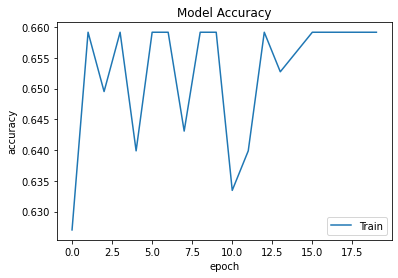

In [19]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

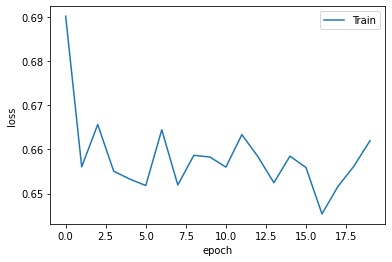

In [20]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [38]:
from google.colab import files
myfile= files.upload()
from google.colab import files
myfile= files.upload()

Saving Unknown-36 to Unknown-36 (1)


Saving Unknown-34 to Unknown-34 (1)


In [39]:
import numpy as np
from tensorflow.keras.preprocessing import image
img3_path=('/content/Unknown-36')
img1 = image.load_img(img3_path, target_size=(150, 150))
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)
x = keras.applications.vgg16.preprocess_input(x)
pred = model.predict(x)
img3_path=('/content/Unknown-34')
img3 = image.load_img(img3_path, target_size=(150, 150))
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)
x = keras.applications.vgg16.preprocess_input(x)
pred = model.predict(x)

1/1 [==============================] - 0s 70ms/step


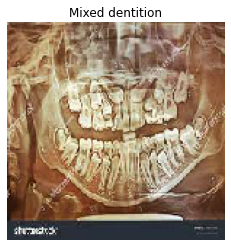

In [40]:
import matplotlib.pyplot as plt

plt.imshow(img1)
plt.axis("off")
if pred<0.5:
    plt.title('Adult')
else:
    plt.title('Mixed dentition')

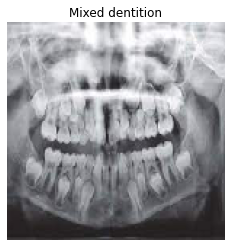

In [41]:
plt.imshow(img3)
plt.axis("off")
if pred<0.5:
    plt.title('Adult')
else:
    plt.title('Mixed dentition')